In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [3]:
plt.style.use("ggplot")
%matplotlib inline

In [4]:
main_train_dir = os.path.join("train/")
main_test_dir = os.path.join("test/")

print(main_train_dir)
print(main_test_dir)

train/
test/


In [5]:
two_thousand_dir = os.path.join("train/2000/")
five_hundered_dir = os.path.join("train/500/")
two_hundered_dir = os.path.join("train/200/")
one_hundered_dir = os.path.join("train/100/")
fifty_dir = os.path.join("train/50/")
twenty_dir = os.path.join("train/20/")
ten_dir = os.path.join("train/10/")
bg_dir = os.path.join("train/Background/")

In [6]:
two_thousand_names = os.listdir(two_thousand_dir)
five_hundered_names = os.listdir(five_hundered_dir)
two_hundered_names = os.listdir(two_hundered_dir)
one_hundered_names = os.listdir(one_hundered_dir)
fifty_names = os.listdir(fifty_dir)
twenty_names = os.listdir(twenty_dir)
ten_names = os.listdir(ten_dir)
bg_names = os.listdir(bg_dir)

print(two_thousand_names[:10])
print(five_hundered_names[:10])
print(two_hundered_names[:10])
print(one_hundered_names[:10])
print(fifty_names[:10])
print(twenty_names[:10])
print(ten_names[:10])
print(bg_names[:10])

['1.jpg', '2.jpg', '2000__144.jpg', '2000__145.jpg', '2000__146.jpg', '2000__147.jpg', '2000__153.jpg', '2000__154.jpg', '2000__155.jpg', '2000__156.jpg']
['1.jpg', '2.jpg', '3.jpg', '31.jpg', '32.jpg', '33.jpg', '500__110.jpg', '500__111.jpg', '500__112.jpg', '500__113.jpg']
['1.jpg', '2.jpg', '200.__70.jpg', '200.__71.jpg', '200.__72.jpg', '200.__73.jpg', '200.__74.jpg', '200.__75.jpg', '200.__76.jpg', '200.__77.jpg']
['1.jpg', '100__150.jpg', '100__151.jpg', '100__152.jpg', '100__153.jpg', '100__154.jpg', '100__155.jpg', '100__310.jpg', '100__311.jpg', '100__312.jpg']
['1.jpg', '2.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '50__0.jpg', '50__1.jpg', '50__10.jpg', '50__11.jpg']
['1.jpg', '18.jpg', '2.jpg', '20__220.jpg', '20__221.jpg', '20__222.jpg', '20__223.jpg', '20__230.jpg', '20__231.jpg', '20__232.jpg']
['1.jpg', '10__60.jpg', '10__61.jpg', '10__62.jpg', '10__63.jpg', '10__64.jpg', '10__65.jpg', '10__66.jpg', '10__67.jpg', '2.jpg']
['Background__155.jpg', 'Background__156.jpg'

In [7]:
print(f"total training of 2Thousand Notes : {len(two_thousand_names)}")
print(f"total training of 5Hundered Notes : {len(five_hundered_names)}")
print(f"total training of 2Hundered Notes : {len(two_hundered_names)}")
print(f"total training of 1Hundered Notes: {len(one_hundered_names)}")
print(f"total training of 50Notes : {len(fifty_names)}")
print(f"total training of 20Notes : {len(twenty_names)}")
print(f"total training of 10Notes : {len(ten_names)}")
print(f"total training of Background Pictures : {len(bg_names)}") 

total training of 2Thousand Notes : 23
total training of 5Hundered Notes : 29
total training of 2Hundered Notes : 16
total training of 1Hundered Notes: 20
total training of 50Notes : 26
total training of 20Notes : 23
total training of 10Notes : 14
total training of Background Pictures : 32


In [8]:
# parameters for graph we'll output images in a 4x4
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

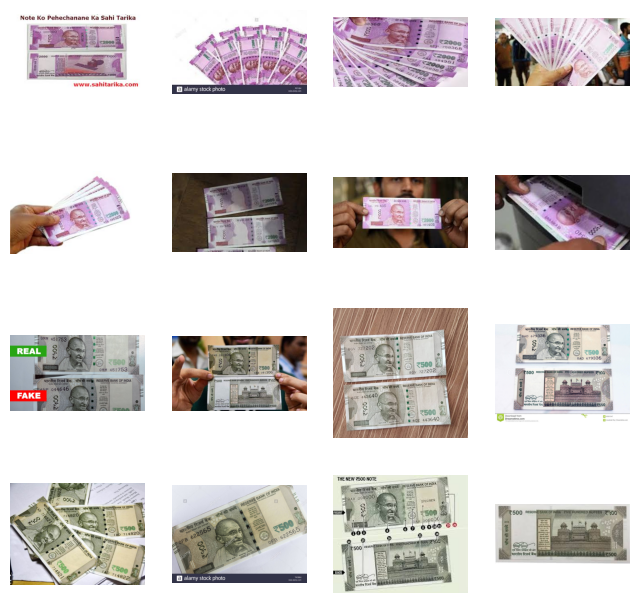

In [9]:
# set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 8

two_thousand_pix = [os.path.join(two_thousand_dir, fname) 
                for fname in two_thousand_names[pic_index-8:pic_index]]

five_hundered_pix = [os.path.join(five_hundered_dir, fname) 
                for fname in five_hundered_names[pic_index-8:pic_index]]


for i, img in enumerate(two_thousand_pix + five_hundered_pix):
    sub_plot = plt.subplot(nrows, ncols, i + 1)
    sub_plot.axis("Off")
    img_read = mpimg.imread(img)
    plt.imshow(img_read)
    
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model without the top (classification) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3)) 

# Freeze the weights of the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding your own classification layers on top of the pre-trained model
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #optimization

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 16,814,152
Trainable params: 2,099,464
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 16,814,152
Trainable params: 2,099,464
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

#Data Augmentation
train_generator = train_datagen.flow_from_directory(main_train_dir,
                                                   batch_size=64,
                                                   target_size=(150,150),
                                                   class_mode="categorical")

validation_generator = validation_datagen.flow_from_directory(main_test_dir,
                                                             batch_size=16,
                                                              target_size=(150,150),
                                                             class_mode="categorical")

Found 183 images belonging to 8 classes.


Found 77 images belonging to 8 classes.


In [14]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)

#fit the model with augmented data
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=len(train_generator),
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    callbacks=[early_stopping])

Epoch 1/100
3/3 [==============================] - 52s 17s/step - loss: 2.6758 - accuracy: 0.2186 - val_loss: 1.5074 - val_accuracy: 0.4935
Epoch 2/100
3/3 [==============================] - 45s 17s/step - loss: 1.7538 - accuracy: 0.3716 - val_loss: 1.2549 - val_accuracy: 0.6364
Epoch 3/100
3/3 [==============================] - 47s 18s/step - loss: 1.3579 - accuracy: 0.5082 - val_loss: 1.1182 - val_accuracy: 0.7143
Epoch 4/100
3/3 [==============================] - 51s 19s/step - loss: 1.1082 - accuracy: 0.6339 - val_loss: 0.8155 - val_accuracy: 0.7403
Epoch 5/100
3/3 [==============================] - 52s 19s/step - loss: 0.8357 - accuracy: 0.7596 - val_loss: 0.6805 - val_accuracy: 0.8182
Epoch 6/100
3/3 [==============================] - 55s 21s/step - loss: 0.6628 - accuracy: 0.7923 - val_loss: 0.6831 - val_accuracy: 0.7792
Epoch 7/100
3/3 [==============================] - 58s 21s/step - loss: 0.5454 - accuracy: 0.8306 - val_loss: 0.6430 - val_accuracy: 0.8442
Epoch 8/100
3/3 [===

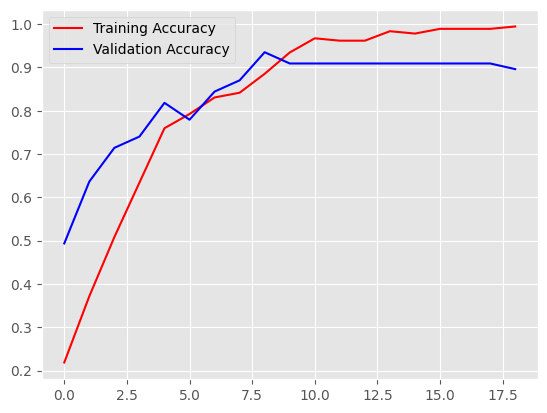

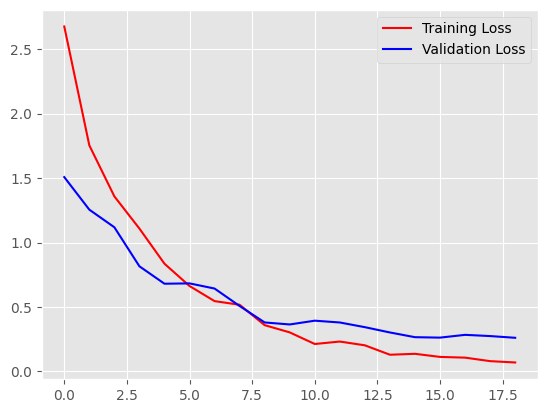

In [15]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")

plt.legend()
plt.figure()

plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")

plt.legend()
plt.show()

1/1 [==============================] - 1s 743ms/step
test/Background/Background_val_12.jpg is Background


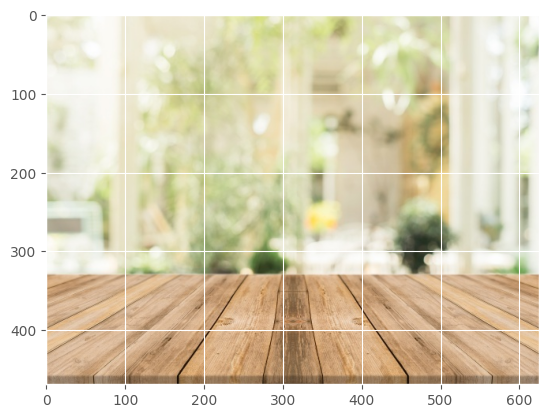

1/1 [==============================] - 0s 239ms/step
test/2000/31.jpg is Two Thousand Rupees


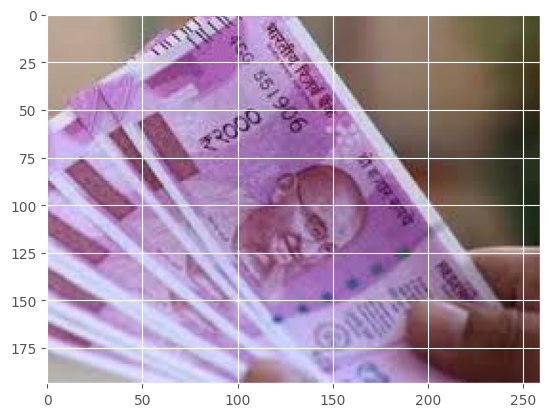

1/1 [==============================] - 0s 240ms/step
test/100/1.jpg is One Hundred Rupees


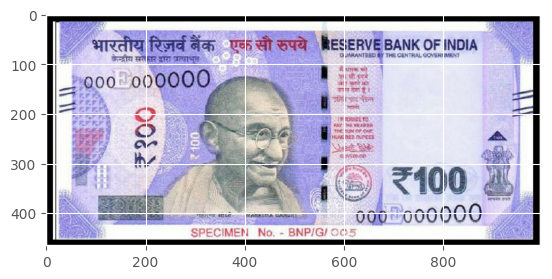

1/1 [==============================] - 0s 238ms/step
test/50/3.jpg is Fifty Rupees


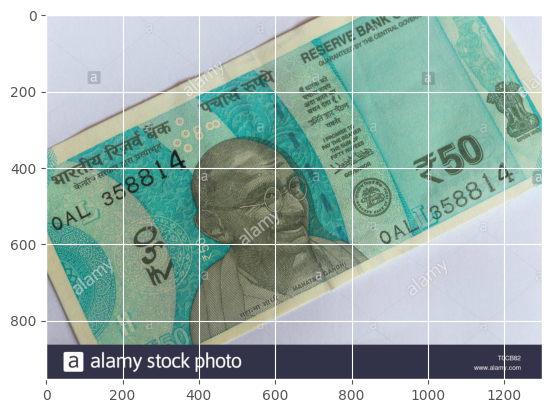

1/1 [==============================] - 0s 273ms/step
test/10/10__126.jpg is Two Hundred Rupees


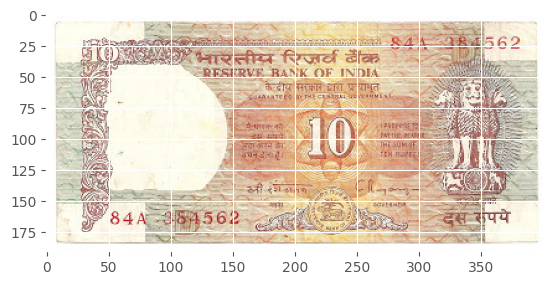

1/1 [==============================] - 0s 243ms/step
test/200/2.jpg is Two Hundred Rupees


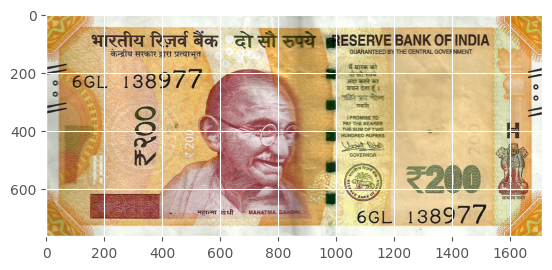

In [16]:
from tensorflow.keras.preprocessing import image

image_paths = [
    "test/Background/Background_val_12.jpg",
    "test/2000/31.jpg",
    "test/100/1.jpg",
    "test/50/3.jpg",
    "test/10/10__126.jpg",
    "test/200/2.jpg"
]

for path in image_paths:
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predicted_class = np.argmax(classes[0])

    if predicted_class == 4:
        print(path + " is Two Thousand Rupees")
    elif predicted_class == 2:
        print(path + " is Five Hundred Rupees")
    elif predicted_class == 3:
        print(path + " is Two Hundred Rupees")
    elif predicted_class == 1:
        print(path + " is One Hundred Rupees")
    elif predicted_class == 5:
        print(path + " is Fifty Rupees")
    elif predicted_class == 6:
        print(path + " is Twenty Rupees")
    elif predicted_class == 7:
        print(path + " is Background")
    else:
        print(path + " is Ten Rupees")

    img = mpimg.imread(path)
    plt.imshow(img)
    plt.show()